In [1]:
pip install dabl

     |████████████████████████████████| 558 kB 5.2 MB/s 


In [2]:
#Para las operaciones matematicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# Para el analisis de Datos
import dabl


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
# Importar nuestros datos
data = pd.read_csv('/content/Mall_Customers.csv')


##Examinar los datos

In [5]:
 # Checar el shape
print("Shape de los Datos :", data.shape)


Shape de los Datos : (200, 5)


In [6]:
 # Checar los head
data.head ()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Checar el tail
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
 # Checar un ejemplo del Dataset
data.sample(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
50,51,Female,49,42,52
70,71,Male,70,49,55
73,74,Female,60,50,56


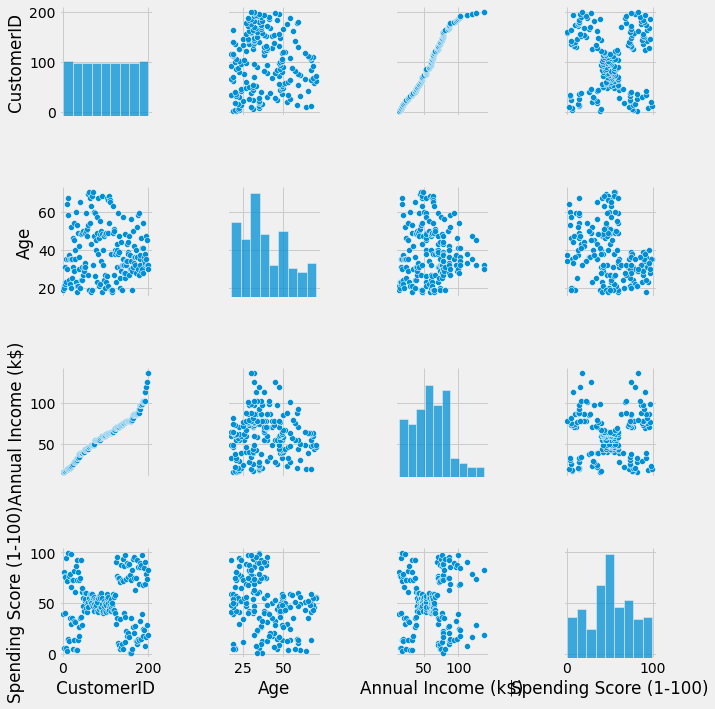

In [9]:
 # Realizar un pairplot para el Dataset
sns.pairplot(data)
plt.show()


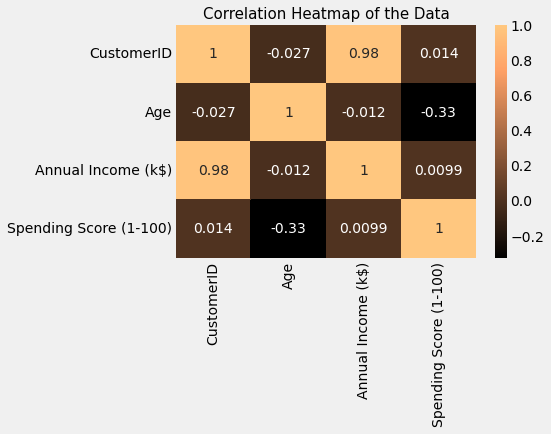

In [10]:
 # Examinar la corelacion del Heat Map del Data
sns. heatmap(data.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c95db6050>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c95d48c90>]],
       dtype=object)]

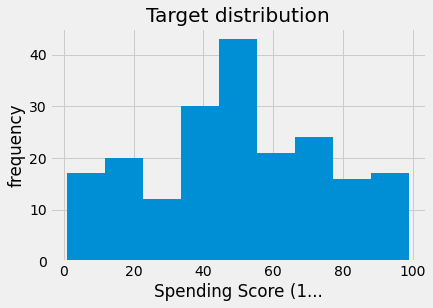

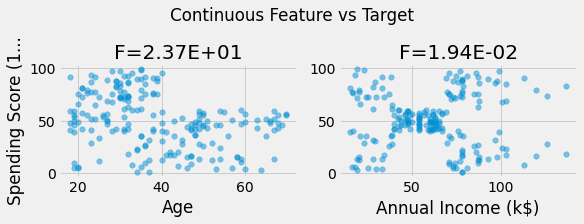

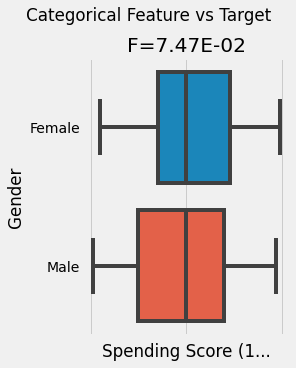

In [11]:
 # Analizar el data con respecto al Spending Score
dabl.plot(data, target_col = 'Spending Score (1-100)')


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c95b9ce90>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c95b24b50>]],
       dtype=object)]

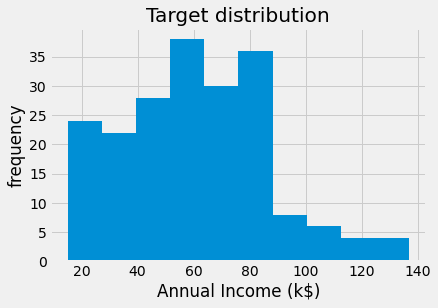

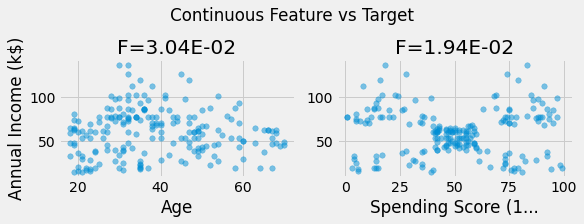

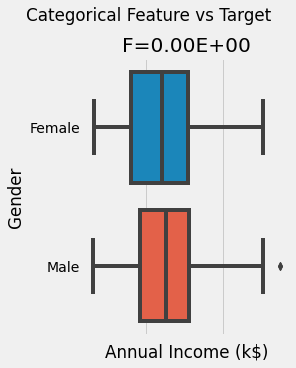

In [12]:
 # Analizar el data con respecto al Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')


In [13]:
 # Describir el data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
 # Describir el categorical data
data.describe(include = 'object')


,Gender
count,200
unique,2
top,Female
freq,112


In [14]:
 # Checar si hay algun NULL data
data.isnull().any().any()


False

##Visualizar los Datos

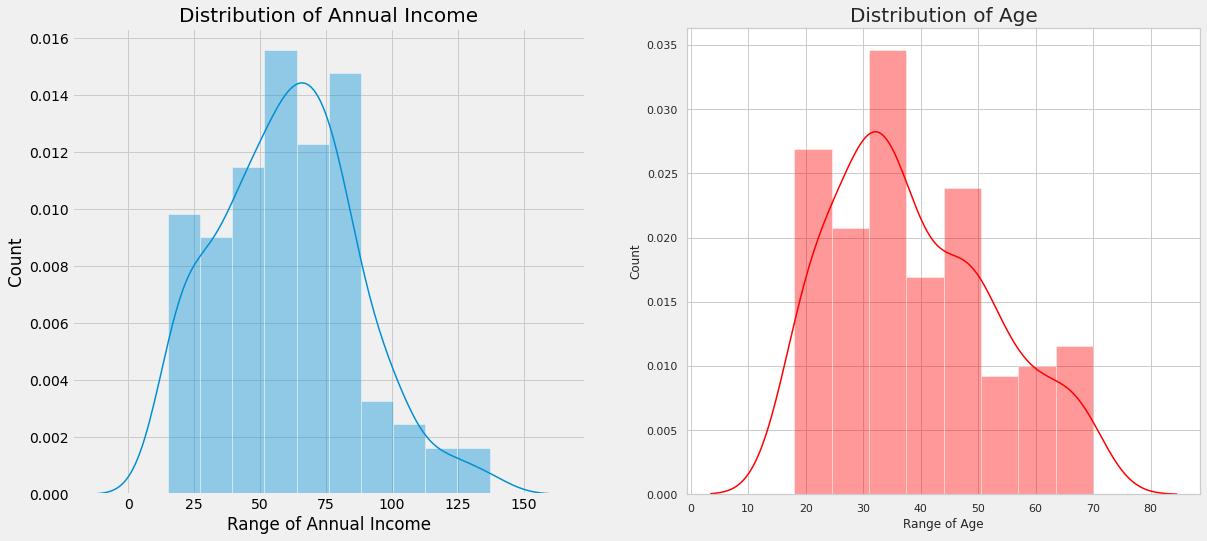

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot (1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel( 'Count' )

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()


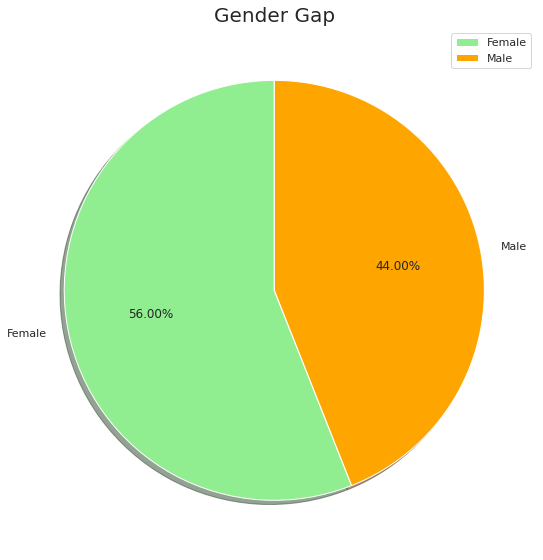

In [16]:
labels = ['Female', 'Male']
size = data[ 'Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


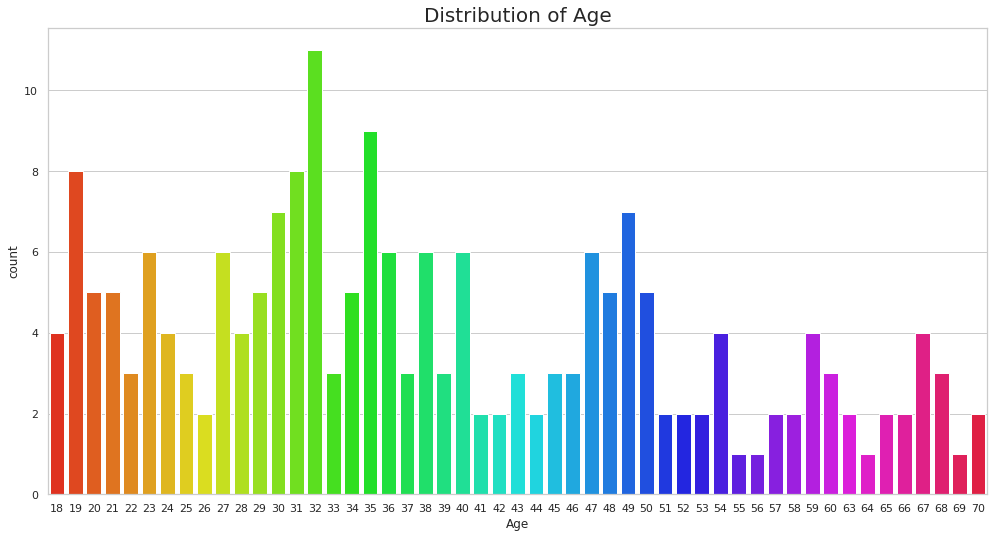

In [17]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()



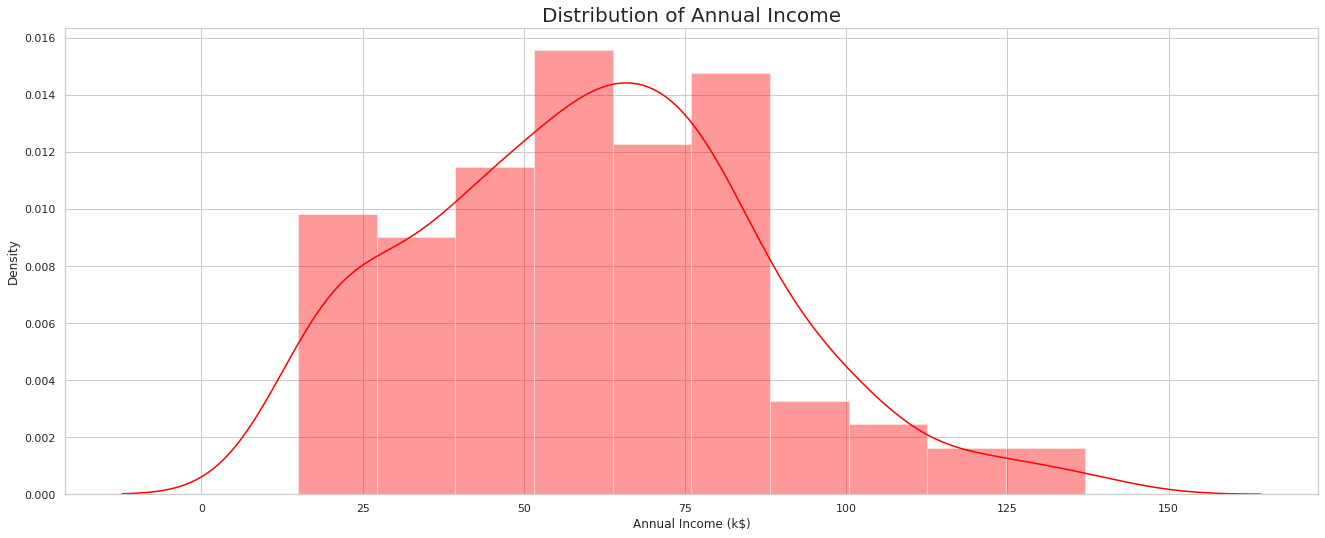

In [18]:
 # Checar la distribuvion del Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()


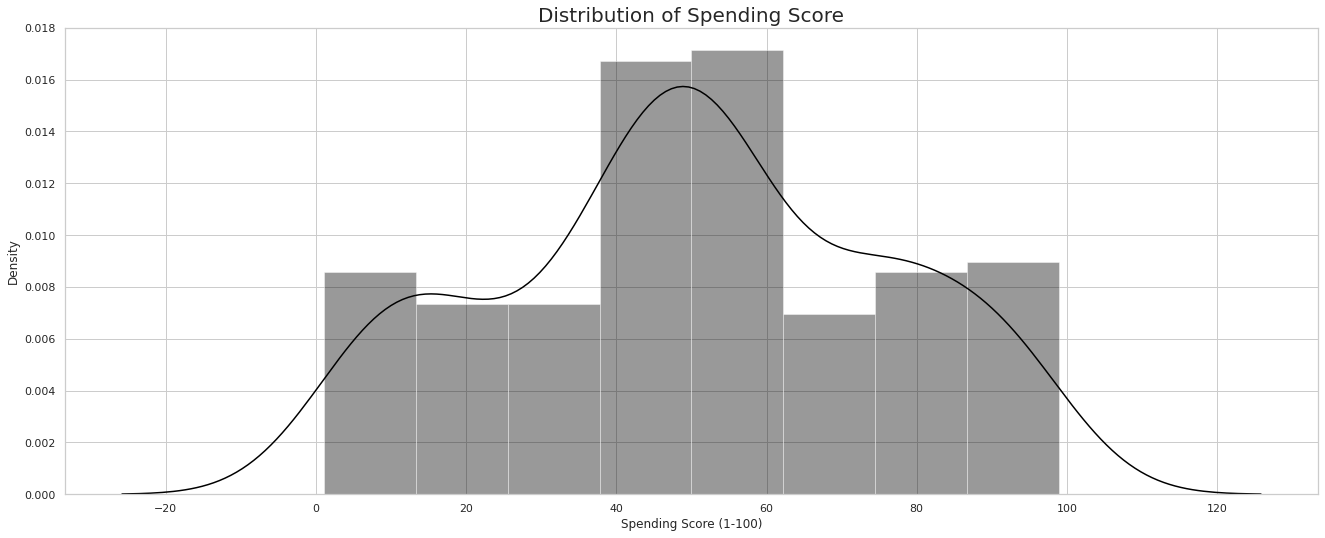

In [19]:
 # Checar la distribucion del Spending Score
plt.rcParams['figure.figsize']= (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()


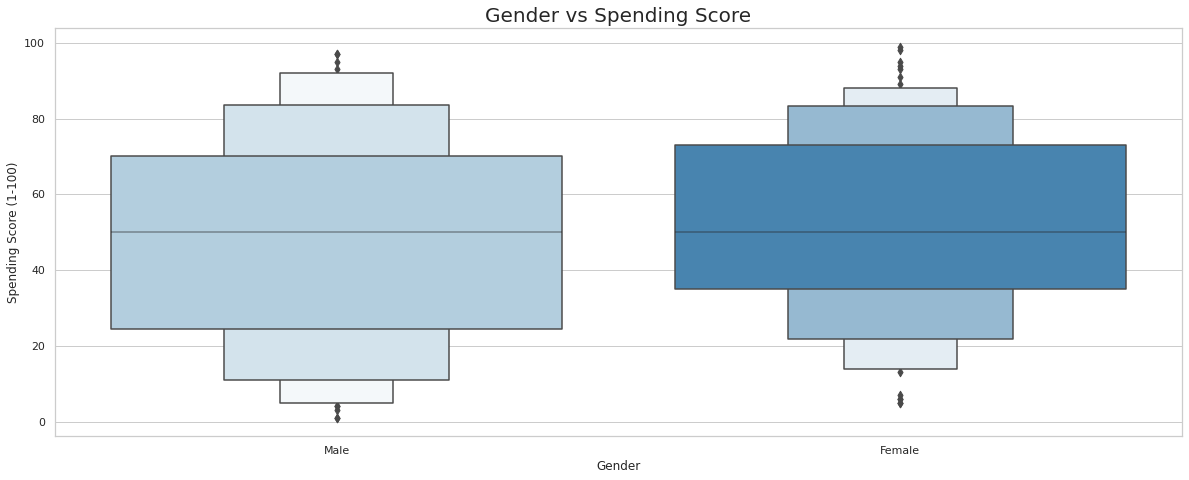

In [20]:
 # Gender vs Spendscore
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data[ 'Gender' ], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()


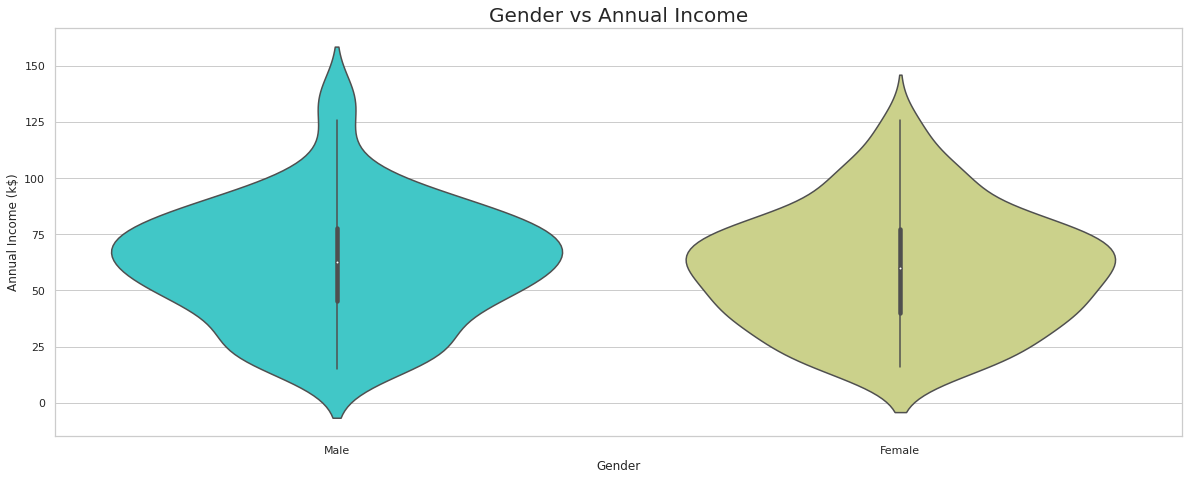

In [21]:
 # Gender vs Annual Income
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot (data['Gender'], data[ 'Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()


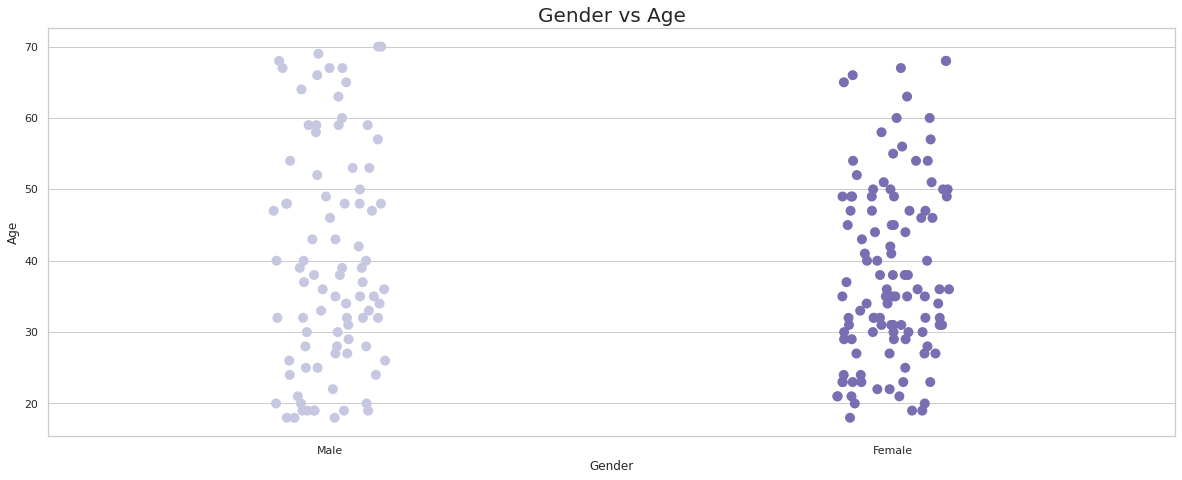

In [22]:
 # Gender vs Age
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data[ 'Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()




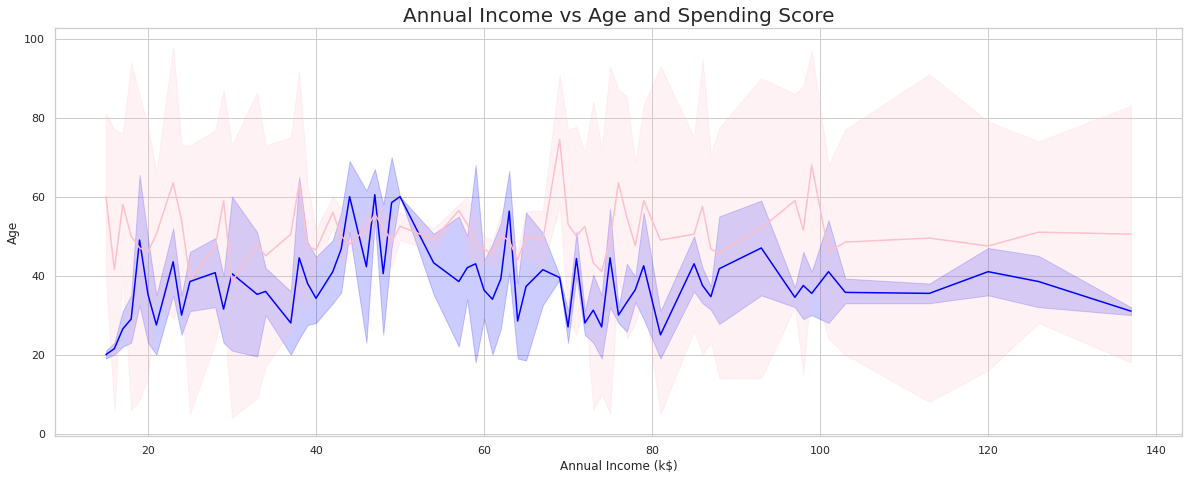

In [23]:
 # Annual Income vs Age and Spending Score
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']
sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()


##Analisis Cluster

In [24]:
# Spending score, yAnnual Income
# Importarla libreria warnings para evitarlos
import warnings
warnings. filterwarnings('ignore')

#Seleccionar las colmunas Spending score, y Annual Income de Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# Checar el  shape de x
print(x.shape)


(200, 2)


In [25]:
 # Checar el data, que vamos a usar para el analisis de clustering
x_data = pd.DataFrame(x)
x_data.head()
# Donde o->Spending Score, y 1->Annual Income


,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


##Algoritmo Kmeans

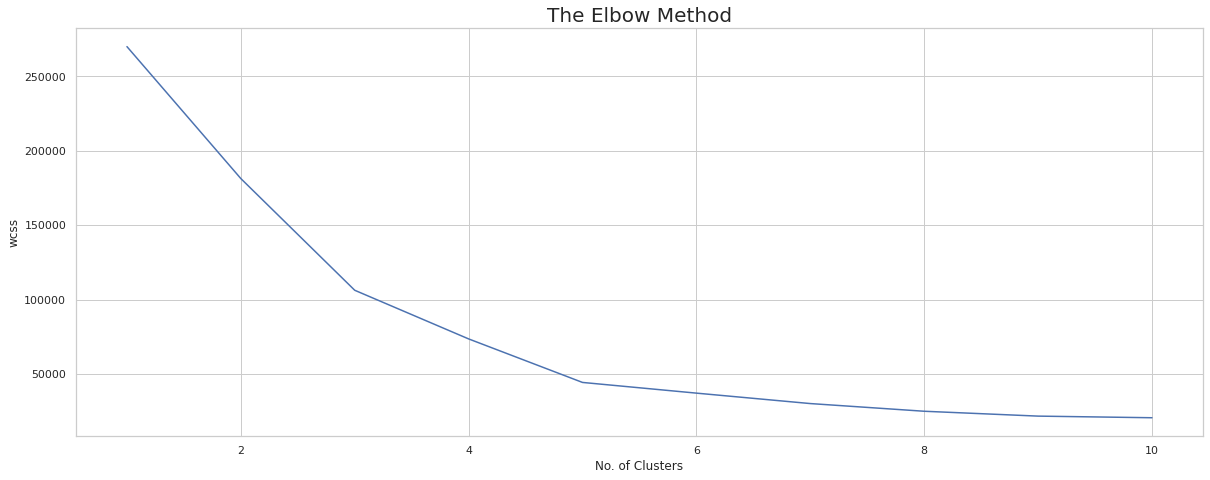

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append (km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


##Vizualizar los Clusters

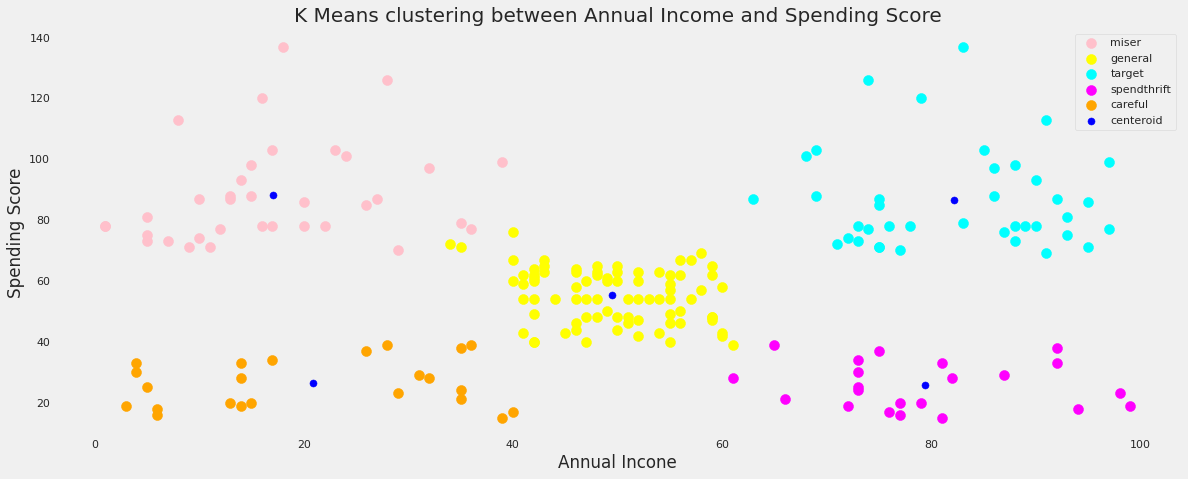

In [27]:
 # Lets visualize these clusters
plt.style.use('fivethirtyeight')

km = KMeans (n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue', label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Incone')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


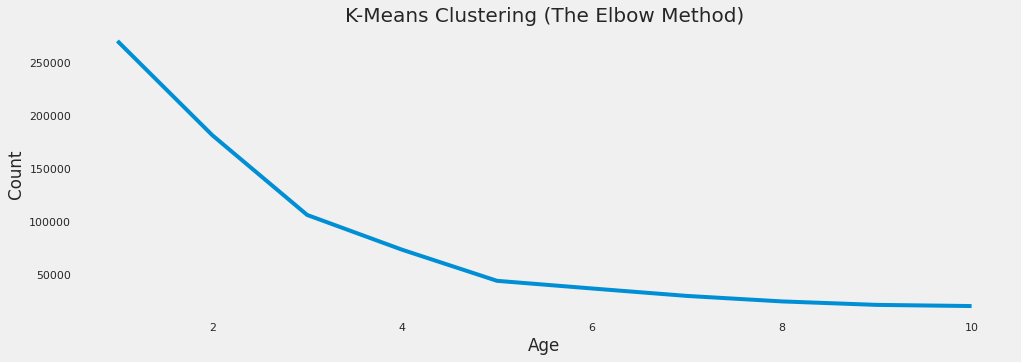

In [28]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering (The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()


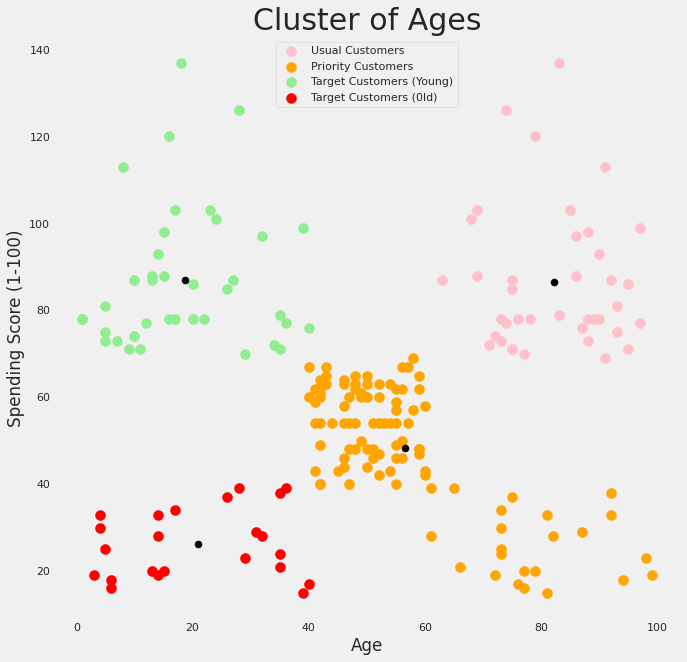

In [29]:
kmeans = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)




plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers (Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers (0ld)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
